In [2]:
import pandas as pd

In [3]:
URL='http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'

In [11]:
data=pd.read_csv(URL)
data.head()
#a single column is panda series

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [13]:
data.shape

(200, 5)

In [15]:
#How to read id numbers as index
data=pd.read_csv(URL,index_col=0)


In [17]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


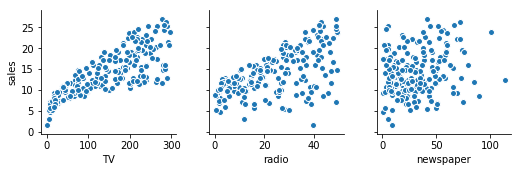

In [22]:
#how to structure data
#predict sales based on advertising dollars using tv, radio, newspaper
#as features , sales as problem. Data points are continuous , this is regression. each observation represent market
#visualize data , use seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#allow plots to appear within library
#visulaize relationship between each of the variable; feature variables and also with the response variable
#done using pairplot function which produces pairs of scatter plot for each x and y variable you specify\

sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'])

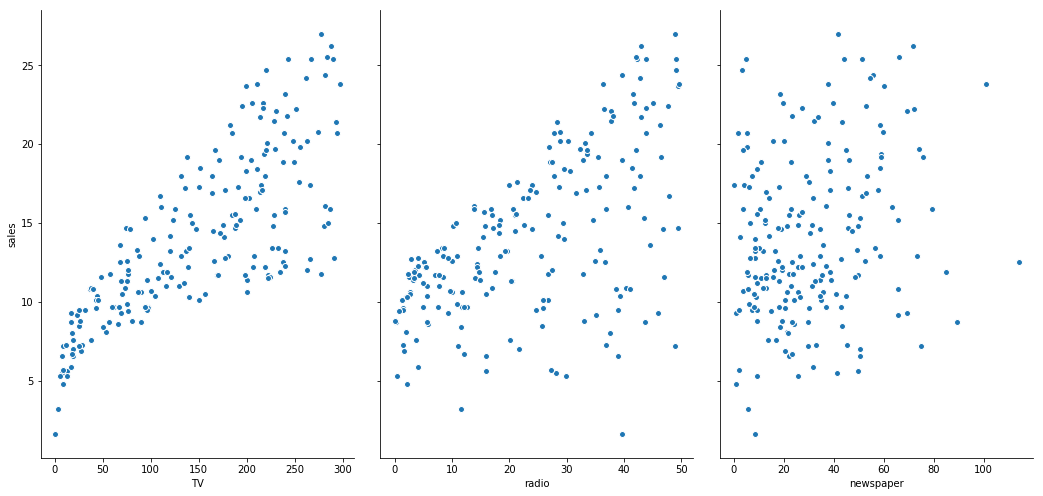

In [24]:
#these scatter plots are small , so we are using the change in size and aspect ratio 
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], size=7,aspect=0.7)

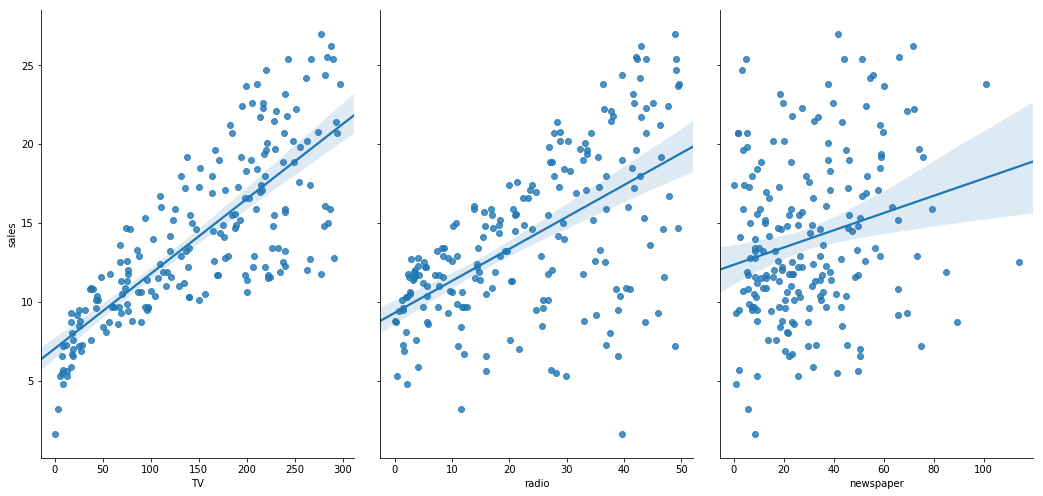

In [26]:
#show plots with best fit line
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], size=7, aspect=0.7,kind='reg')

In [27]:
#so linear relnshp b/w tv and sales, so going ahead with linear refression
#regression vs linear regression:
#regression relates to machine learning is a type of supervised learning problem whose response is continuous linear regression
#Linear regression is paticular ML model that can be used for regression problem
#no tunining required in regression as n knn
#assume relationship between variables(response and feature) is linear
#y= b0+ b1(TV)+b2(radio)+b3(newspaper)
#b0 - is value of y when all x(tv, radio , newspaper) values are zero
#b0,b1,b2,b3 - intercept and model coefficient are learned during model fitting process aka "least square"


In [29]:
#defiening feature matrix X and response vector y
feature_cols=["TV", "radio", "newspaper"]
X=data[feature_cols]  #to select subset of columns from original data
#or
X=data[["TV", "radio", "newspaper"]] #inner bracket defines the python list ; outer to tell pandas how /what you want to select
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [31]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [34]:
y=data['sales']
#if there are no spaces in column name
y=data.sales


In [36]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [37]:
y.shape


(200,)

In [39]:
type(y)

pandas.core.series.Series

In [45]:
#splitting into testing and training dastasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X, y, random_state=1 ) #test_size- defaullt-0.25

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [51]:
#build model
#here model is learning intercept b0 and ,model coefficient for line of best fit
#Linear Regression
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
#interpreting model coefficients
print(linreg.intercept_) 
#the underscore after the object(intercept_) is convention by scikit to identify the attribute of the object

2.8769666223179318


In [56]:
print(linreg.coef_)

[0.04656457 0.17915812 0.00345046]


In [61]:
#hard to remember coeffi
#uze zip to pair each of feature names from feature_cols list with coeff
list(zip(feature_cols, linreg.coef_))
#what it means
#spending a unit increase in tv ad will lead to 0.4656 unit increase in sales
#unit of ad spending represent 1000 dollars$
#unit of sales represents  sale of 1000 items
#increase of 1000 $ in tv ad leads to increase in sales of 46.6 item

[('TV', 0.04656456787415029),
 ('radio', 0.1791581224508884),
 ('newspaper', 0.003450464711180379)]

In [78]:
#ML focusses on association rather than causation
#lets use the fit model to predict
y_pred=linreg.predict(X_test)
y_pred

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

In [65]:
y_pred.shape

(50,)

In [66]:
#we need evaluation metrics to compare our prediction with actual values. Unlike, Knn we will be useing different meteris here
#three types are there
#MAE, mse, rmse
true=[100,50,30,20]
pred=[90,50,50,30]


In [68]:
#calculating mean absolute error(MAE)
from sklearn import metrics
metrics.mean_absolute_error(true, pred)

10.0

In [71]:
#mse
metrics.mean_squared_error(true, pred)

150.0

In [73]:
#rmse
import numpy as np
np.sqrt(metrics.mean_squared_error(true, pred))

12.24744871391589

In [81]:
mse=metrics.mean_squared_error(y_test, y_pred)

In [83]:
#why rmse >mae
#rmse uses squared errors hence, increasing the weight of larger errors

#rmse- our evaluation metrics
np.sqrt(mse)

1.4046514230328948

In [86]:
#feature selection 
#weak correlation with newspaper- so removing from our model
feature_cols=['TV', "radio"]
X=data[feature_cols]
y=data['sales']

In [88]:
#traain test split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1)

In [90]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
y_pred=linreg.predict(X_test)

In [95]:
mse=metrics.mean_squared_error(y_test, y_pred)
np.sqrt(mse) #lower the nuber, better the model ; removing newspaper makes rmse decrease from 1.404 to 1.387 
#try and test different rmse to create best model


1.3879034699382886